# Canadian Banks Stock Data Analysis

The aim of this project is to analyze the stock prices of the major banks of Canada. In this project, I have chosen five 
popular banks in Canada: BMO, CIBC, RBC, Scotiabank and TD. The stock data has been selected for this analysis is from January, 2007 to December, 2017. The stock data has been taken from yahoo finance.

## import libraries

In [2]:
#import numpy, pandas and pandas_datareader. pandas_datareader is used in order to read dataset directly from the web
import numpy as np
import pandas as pd
from pandas_datareader import data,wb
import datetime

In [3]:
#import data visulization libraries: matplotlib and seasborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import plotly and cufflinks for interactive data visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

## Loading data sets

In [4]:
#initialize the start and the end date of the stock data to be considered
start = datetime.datetime(2007,1,1)
end = datetime.datetime(2017,12,31)

In [5]:
#reading stock data from the web and assing to seperate data frame
df_bmo = data.DataReader('BMO','yahoo',start,end)
df_bns = data.DataReader('BNS','yahoo',start,end)
df_cibc = data.DataReader('CM','yahoo',start,end)
df_rbc = data.DataReader('RY','yahoo',start,end)
df_td = data.DataReader('TD','yahoo',start,end)

In [6]:
#showing top 3 tows
df_bmo.head(3)

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2007-01-03  59.549999  59.029999  59.290001  59.169998  128200.0  31.204594
2007-01-04  59.090000  58.290001  59.049999  58.790001  359600.0  31.004189
2007-01-05  58.630001  58.240002  58.590000  58.549999  122100.0  30.877609

In [7]:
#showing top 3 tows
df_bns.head(3)

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2007-01-03  44.889999  44.119999  44.820000  44.430000  115100.0  24.366684
2007-01-04  44.509998  44.279999  44.459999  44.500000  385000.0  24.405077
2007-01-05  44.500000  44.130001  44.459999  44.389999   71600.0  24.344753

In [8]:
#showing bottom 3 tows
df_cibc.tail(3)

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2017-12-27  96.540001  95.660004  95.660004  96.339996  480300.0  92.117256
2017-12-28  97.410004  96.519997  96.519997  97.330002  534900.0  93.063866
2017-12-29  97.750000  97.209999  97.349998  97.410004  275000.0  93.140366

In [9]:
#showing top 3 tows
df_rbc.head(3)

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2007-01-03  47.860001  47.160000  47.480000  47.419998  206300.0  27.579473
2007-01-04  47.459999  46.689999  47.380001  46.840000  173100.0  27.242140
2007-01-05  46.799999  46.230000  46.740002  46.480000  200600.0  27.032774

In [10]:
#showing bottom 3 tows
df_td.tail(3)

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2017-12-27  58.230000  57.549999  57.570000  57.970001  1147400.0  55.414276
2017-12-28  58.419998  57.810001  58.150002  58.400002  1310300.0  55.825314
2017-12-29  58.669998  58.160000  58.570000  58.580002  1041900.0  55.997379

In [11]:
#number of rows and columns of the data sets
bmo_shape = df_bmo.shape
bns_shape = df_bns.shape
cibc_shape = df_cibc.shape
rbc_shape = df_rbc.shape
td_shape = df_td.shape
print('BMO: {a} BNS: {b} CIBC: {c} RBC: {d} TD: {e}'.format(a=bmo_shape,b=bns_shape,c=cibc_shape,d=rbc_shape,e=td_shape))

BMO: (2769, 6) BNS: (2769, 6) CIBC: (2769, 6) RBC: (2769, 6) TD: (2769, 6)


In [12]:
#data types of fetures, number of rows and columns
#df_bmo.info()
#df_bns.info()
#df_cibc.info()
#df_rbc.info()
df_td.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2007-01-03 to 2017-12-29
Data columns (total 6 columns):
High         2769 non-null float64
Low          2769 non-null float64
Open         2769 non-null float64
Close        2769 non-null float64
Volume       2769 non-null float64
Adj Close    2769 non-null float64
dtypes: float64(6)
memory usage: 151.4 KB


## Merging data frames into one

In [13]:
#creating a list of headers of the banks. This list will be used as the column header of the DF after merging all the data frames
tickers = "BMO BNS CIBC RBC TD".split()
tickers

['BMO', 'BNS', 'CIBC', 'RBC', 'TD']

In [14]:
#merging five DFs in order to make a single DF.
df_stocks = pd.concat([df_bmo,df_bns,df_cibc,df_rbc,df_td],axis=1,keys=tickers)

In [15]:
df_stocks.head()

BMO                                                        \
                 High        Low       Open      Close    Volume  Adj Close   
Date                                                                          
2007-01-03  59.549999  59.029999  59.290001  59.169998  128200.0  31.204594   
2007-01-04  59.090000  58.290001  59.049999  58.790001  359600.0  31.004189   
2007-01-05  58.630001  58.240002  58.590000  58.549999  122100.0  30.877609   
2007-01-08  58.669998  58.220001  58.400002  58.330002   61900.0  30.761595   
2007-01-09  58.580002  58.000000  58.250000  58.459999   89100.0  30.830154   

                  BNS                                     ...            RBC  \
                 High        Low       Open      Close    ...           Open   
Date                                                      ...                  
2007-01-03  44.889999  44.119999  44.820000  44.430000    ...      47.480000   
2007-01-04  44.509998  44.279999  44.459999  44.500000    ...      47.380001   
2007-01-05  44.500000  44.130001  44.459999  44.389999    ...      46.740002   
2007-01-08  44.419998  44.169998  44.389999  44.220001    ...      46.340000   
2007-01-09  44.150002  43.669998  44.139999  43.799999    ...      46.119999   

                                                   TD                        \
                Close    Volume  Adj Close       High        Low       Open   
Date                                                                          
2007-01-03  47.419998  206300.0  27.579473  29.905001  29.660000  29.695000   
2007-01-04  46.840000  173100.0  27.242140  29.770000  29.545000  29.725000   
2007-01-05  46.480000  200600.0  27.032774  29.665001  29.445000  29.635000   
2007-01-08  46.299999  111700.0  26.928074  29.695000  29.420000  29.549999   
2007-01-09  45.889999  209900.0  26.689631  29.575001  29.280001  29.500000   

                                            
                Close    Volume  Adj Close  
Date                                        
2007-01-03  29.719999  955400.0  13.542470  
2007-01-04  29.635000  762400.0  13.503737  
2007-01-05  29.525000  234800.0  13.453614  
2007-01-08  29.555000  239200.0  13.467287  
2007-01-09  29.309999  334000.0  13.355646  

[5 rows x 30 columns]

In [16]:
#leveling two columns
df_stocks.columns.names = ['Banks', 'Stock Info']

In [17]:
df_stocks.head(3)

Banks             BMO                                                        \
Stock Info       High        Low       Open      Close    Volume  Adj Close   
Date                                                                          
2007-01-03  59.549999  59.029999  59.290001  59.169998  128200.0  31.204594   
2007-01-04  59.090000  58.290001  59.049999  58.790001  359600.0  31.004189   
2007-01-05  58.630001  58.240002  58.590000  58.549999  122100.0  30.877609   

Banks             BNS                                     ...            RBC  \
Stock Info       High        Low       Open      Close    ...           Open   
Date                                                      ...                  
2007-01-03  44.889999  44.119999  44.820000  44.430000    ...      47.480000   
2007-01-04  44.509998  44.279999  44.459999  44.500000    ...      47.380001   
2007-01-05  44.500000  44.130001  44.459999  44.389999    ...      46.740002   

Banks                                              TD                  \
Stock Info      Close    Volume  Adj Close       High     Low    Open   
Date                                                                    
2007-01-03  47.419998  206300.0  27.579473  29.905001  29.660  29.695   
2007-01-04  46.840000  173100.0  27.242140  29.770000  29.545  29.725   
2007-01-05  46.480000  200600.0  27.032774  29.665001  29.445  29.635   

Banks                                       
Stock Info      Close    Volume  Adj Close  
Date                                        
2007-01-03  29.719999  955400.0  13.542470  
2007-01-04  29.635000  762400.0  13.503737  
2007-01-05  29.525000  234800.0  13.453614  

[3 rows x 30 columns]

### Finding the high and low of BMO over the time period

In [18]:
#high stock price of a day of BMO (from df_BMO DF)
df_bmo[df_bmo['High'] == df_bmo['High'].max()]

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2017-12-29  80.300003  79.790001  79.970001  80.019997  220000.0  76.244553

In [19]:
#low stock price of a day of BMO (from df_BMO DF)
#df_bmo['Low'].min()
df_bmo[df_bmo['Low'] == df_bmo['Low'].min()]

High    Low       Open      Close     Volume  Adj Close
Date                                                                    
2009-02-24  21.219999  19.32  19.610001  21.030001  1685900.0  12.618166

In [20]:
#high stock price of a day of BMO (from df_stocks DF)
df_stocks[df_stocks['BMO']['High'] == df_stocks['BMO']['High'].max()]['BMO']

Stock Info       High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2017-12-29  80.300003  79.790001  79.970001  80.019997  220000.0  76.244553

In [21]:
#low stock price of a day of BMO (from df_stocks DF)
df_stocks[df_stocks['BMO']['Low'] == df_stocks['BMO']['Low'].min()]['BMO']

Stock Info       High    Low       Open      Close     Volume  Adj Close
Date                                                                    
2009-02-24  21.219999  19.32  19.610001  21.030001  1685900.0  12.618166

### Finding the high and low of all the banks over the time period

In [22]:
#using loop
for tick in tickers:
    print(tick, df_stocks[df_stocks[tick]['High'] == df_stocks[tick]['High'].max()][tick])

BMO Stock Info       High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2017-12-29  80.300003  79.790001  79.970001  80.019997  220000.0  76.244553
BNS Stock Info       High    Low       Open      Close    Volume  Adj Close
Date                                                                   
2014-07-31  68.709999  67.68  68.099998  67.900002  472500.0  52.538589
CIBC Stock Info        High         Low        Open       Close    Volume  \
Date                                                                   
2007-11-07  108.790001  105.309998  108.040001  105.519997  163200.0   

Stock Info  Adj Close  
Date                   
2007-11-07  53.577896  
RBC Stock Info       High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2017-12-29  81.809998  81.419998  81.809998  81.650002  463600.0  77.138138
TD Stock Info       Hi

In [23]:
#using cross-section method, xs
df_stocks.xs(key='High',axis=1,level='Stock Info').max()

Banks
BMO      80.300003
BNS      68.709999
CIBC    108.790001
RBC      81.809998
TD       58.759998
dtype: float64

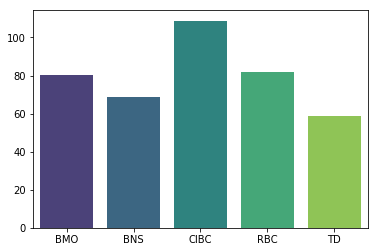

In [24]:
#plotting max high value over the time period
sns.barplot(x=tickers,y=df_stocks.xs(key='High',axis=1,level='Stock Info').max(),palette='viridis')

### Finding the max, min and mean of 'Close' price of all banks throughout the time period

In [25]:
#max Close price
df_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Banks
BMO      80.019997
BNS      68.330002
CIBC    108.239998
RBC      81.650002
TD       58.669998
dtype: float64

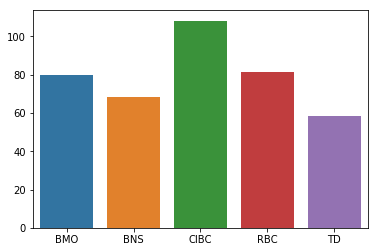

In [26]:
sns.barplot(x=tickers,y=df_stocks.xs(key='Close',axis=1,level='Stock Info').max())

In [27]:
#min Close price
df_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Banks
BMO     19.510000
BNS     19.320000
CIBC    28.389999
RBC     20.620001
TD      13.100000
dtype: float64

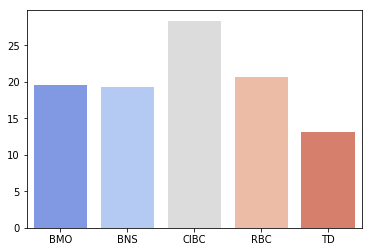

In [28]:
sns.barplot(x=tickers,y=df_stocks.xs(key='Close',axis=1,level='Stock Info').min(),palette='coolwarm')

In [29]:
#average Close price
x_CloseMean = df_stocks.xs(key='Close',axis=1,level='Stock Info').mean()
x_CloseMean

Banks
BMO     59.255674
BNS     51.370303
CIBC    75.231842
RBC     56.758794
TD      39.040708
dtype: float64

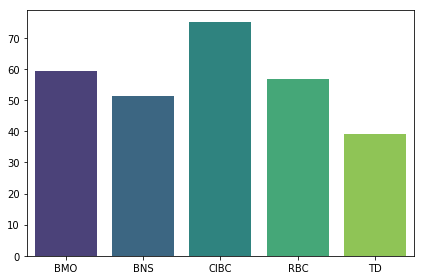

In [30]:
sns.barplot(x=tickers,y=x_CloseMean,palette='viridis')
plt.tight_layout()

### Finding the average Close price of all banks in last year, 2017

In [31]:
df_stocks['2017-1-1':'2017-12-29'].xs(key='Close',axis=1,level='Stock Info').mean()

Banks
BMO     74.708566
BNS     60.906853
CIBC    86.090797
RBC     74.136454
TD      52.244701
dtype: float64

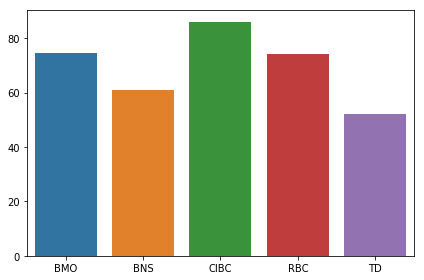

In [32]:
sns.barplot(x=tickers,y=df_stocks['2017-1-1':'2017-12-29'].xs(key='Close',axis=1,level='Stock Info').mean())
plt.tight_layout()

### Finding returns

In [33]:
#creating an empty data frame in order to store percent of change of 'Close' price for each bank.
df_return = pd.DataFrame()

In [34]:
#Percentage of change is calculated by applying pct_change() method on 'Close' data.
for tick in tickers:
    df_return[tick + ' return'] = df_stocks[tick]['Close'].pct_change()

In [35]:
df_return.head(3)
#the first row in NaN, because pct_change() is calculated based on the difference of present and past values

BMO return  BNS return  CIBC return  RBC return  TD return
Date                                                                  
2007-01-03         NaN         NaN          NaN         NaN        NaN
2007-01-04   -0.006422    0.001576    -0.009700   -0.012231  -0.002860
2007-01-05   -0.004082   -0.002472     0.003942   -0.007686  -0.003712

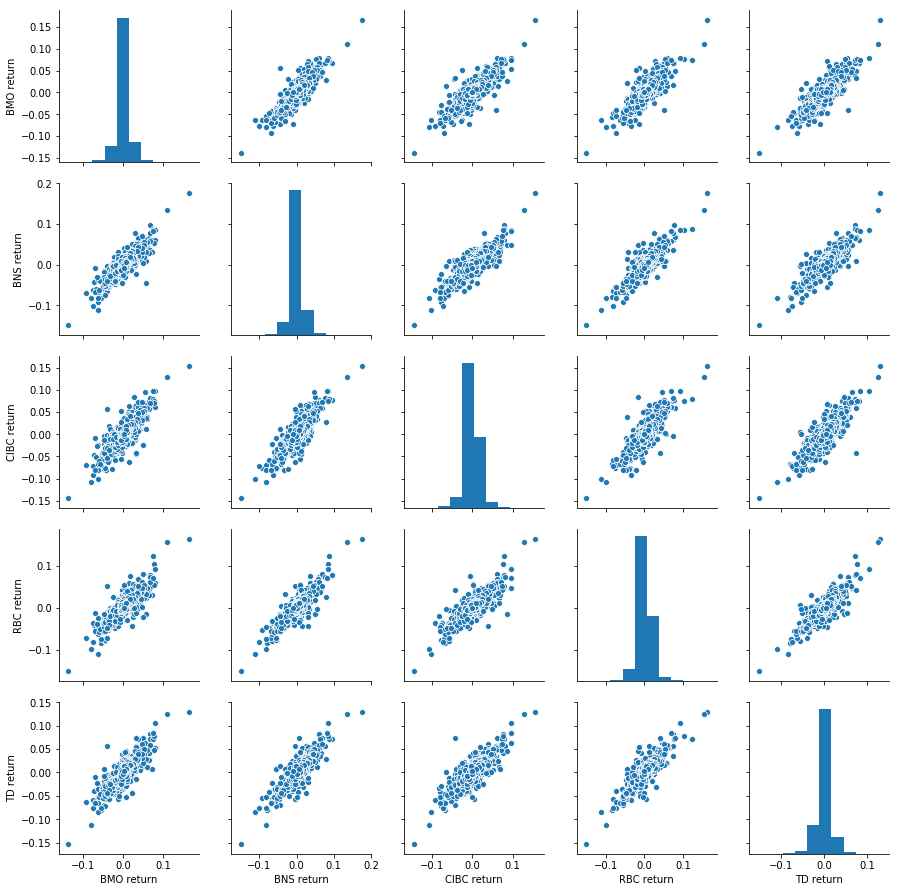

In [37]:
sns.pairplot(data=df_return[1:],palette='viridis')

### Finding best and worst return of a day for each bank

In [38]:
#best return
df_return.max()

BMO return     0.165589
BNS return     0.175668
CIBC return    0.154492
RBC return     0.163435
TD return      0.129809
dtype: float64

In [39]:
#date of best return
df_return.idxmax()
#it is interesting to see that all banks had largest return on the same day

BMO return    2008-10-13
BNS return    2008-10-13
CIBC return   2008-10-13
RBC return    2008-10-13
TD return     2008-10-13
dtype: datetime64[ns]

In [40]:
#worst return
df_return.min()

BMO return    -0.137873
BNS return    -0.149413
CIBC return   -0.144566
RBC return    -0.150961
TD return     -0.152371
dtype: float64

In [42]:
#date of worst return
df_return.idxmin()
#on the same day once again!!

BMO return    2008-11-20
BNS return    2008-11-20
CIBC return   2008-11-20
RBC return    2008-11-20
TD return     2008-11-20
dtype: datetime64[ns]

### which bank's stock price fluctuated more/less over the entire period. In other word, which bank's stock price was risky

In [44]:
df_return.std()

BMO return     0.016897
BNS return     0.017351
CIBC return    0.018199
RBC return     0.017317
TD return      0.016567
dtype: float64

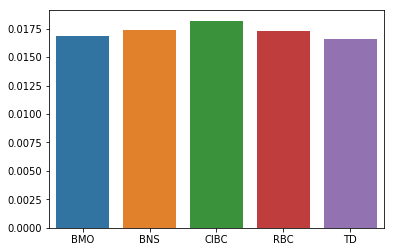

In [45]:
sns.barplot(x=tickers,y=(df_return.std()))

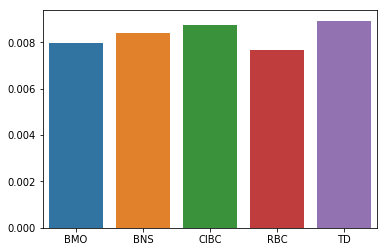

In [46]:
#on year of 2017
sns.barplot(x=tickers,y=(df_return['2017-1-1':'2017-12-29'].std()))

### Close pices of each bank over the entire time period

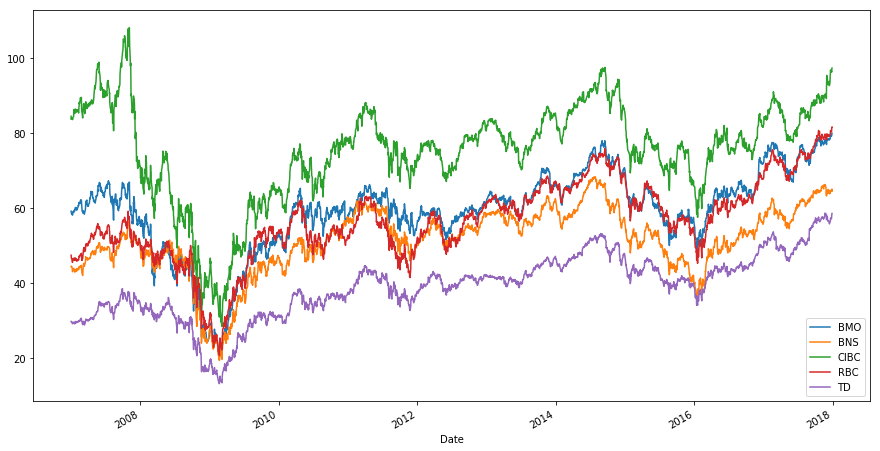

In [50]:
for tick in tickers:
    df_stocks[tick]['Close'].plot(label=tick,figsize=(15,8))
plt.legend()

In [52]:
#same plot using cross-section method,xs
df_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Finding the correlation of the Close prices among the banks over period

In [53]:
#heat map or cluster map can show the correlation among objects.
#the first step is to orgranize the data set in to matrix form in order to create heat map or cluster map
#present data frame with respect to Close price
df_stocks.xs(key='Close',axis=1,level='Stock Info').head(3)

Banks             BMO        BNS       CIBC        RBC         TD
Date                                                             
2007-01-03  59.169998  44.430000  84.540001  47.419998  29.719999
2007-01-04  58.790001  44.500000  83.720001  46.840000  29.635000
2007-01-05  58.549999  44.389999  84.050003  46.480000  29.525000

In [54]:
df_stocks_matrixForm = df_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
df_stocks_matrixForm

Banks       BMO       BNS      CIBC       RBC        TD
Banks                                                  
BMO    1.000000  0.902975  0.912385  0.931229  0.918641
BNS    0.902975  1.000000  0.838816  0.888061  0.896543
CIBC   0.912385  0.838816  1.000000  0.788601  0.766598
RBC    0.931229  0.888061  0.788601  1.000000  0.962543
TD     0.918641  0.896543  0.766598  0.962543  1.000000

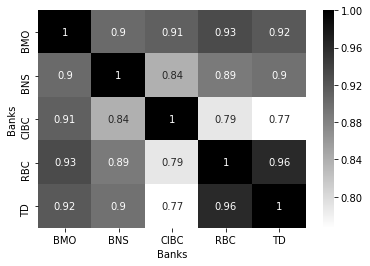

In [65]:
#heat map
sns.heatmap(df_stocks_matrixForm,annot=True,cmap='binary')

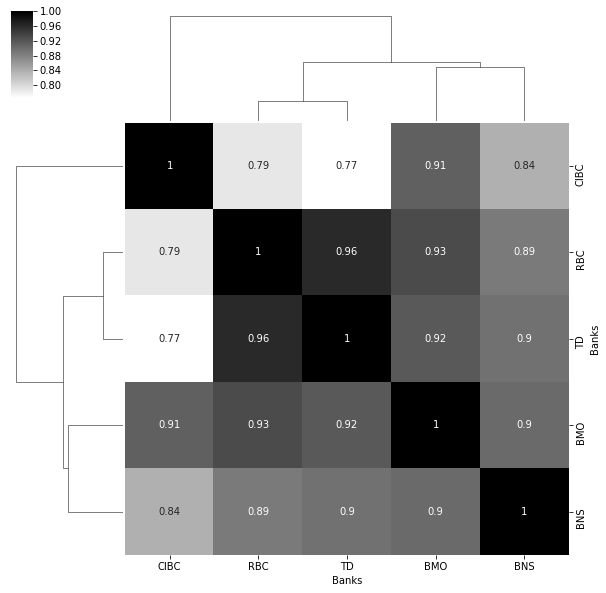

In [66]:
#cluster map
sns.clustermap(df_stocks_matrixForm,annot=True,cmap='binary')